In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import os

## Data Preparation

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-revenue-expenses-and-its-premium-users/Spotify Quarterly.csv


In [4]:
df = pd.read_csv('/kaggle/input/spotify-revenue-expenses-and-its-premium-users/Spotify Quarterly.csv')

In [5]:
df.head()

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,31-12-2022,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,30-09-2022,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,30-06-2022,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,31-03-2022,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0


In [6]:
df.describe()

,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,26.000000,25.000000,25.000000,25.000000
mean,1949.200000,1448.320000,501.280000,1721.400000,1247.040000,474.360000,215.760000,201.680000,14.080000,294.720000,130.080000,172.52000,4.702308,243.840000,203.000000,102.360000
std,688.571468,511.590634,188.493484,599.337203,409.621419,191.566977,107.578762,105.019332,15.739864,117.212599,49.435918,71.70258,0.452560,95.165505,101.236522,34.507101
min,902.000000,775.000000,105.000000,828.000000,686.000000,118.000000,74.000000,87.000000,-16.000000,131.000000,52.000000,82.00000,4.120000,110.000000,80.000000,42.000000
25%,1449.000000,1010.000000,373.000000,1210.000000,894.000000,316.000000,130.000000,115.000000,4.000000,191.000000,87.000000,109.00000,4.385000,172.000000,135.000000,73.000000
50%,1855.000000,1381.000000,479.000000,1700.000000,1219.000000,481.000000,175.000000,157.000000,18.000000,286.000000,130.000000,163.00000,4.640000,236.000000,173.000000,102.000000
75%,2501.000000,1833.000000,668.000000,2178.000000,1545.000000,633.000000,282.000000,286.000000,25.000000,381.000000,172.000000,220.00000,4.882500,294.000000,253.000000,126.000000
max,3166.000000,2365.000000,801.000000,2717.000000,1939.000000,778.000000,449.000000,426.000000,42.000000,515.000000,210.000000,317.00000,6.000000,453.000000,435.000000,171.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           26 non-null     object 
 1   Total Revenue                  25 non-null     float64
 2   Cost of Revenue                25 non-null     float64
 3   Gross Profit                   25 non-null     float64
 4   Premium Revenue                25 non-null     float64
 5   Premium Cost Revenue           25 non-null     float64
 6   Premium Gross Profit           25 non-null     float64
 7   Ad Revenue                     25 non-null     float64
 8   Ad Cost of revenue             25 non-null     float64
 9   Ad gross Profit                25 non-null     float64
 10  MAUs                           25 non-null     float64
 11  Premium MAUs                   25 non-null     float64
 12  Ad MAUs                        25 non-null     float

## Data Cleaning

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [9]:
df['Year'] = df['Date'].dt.year 

In [10]:
df.isna().sum()

Date                             0
Total Revenue                    1
Cost of Revenue                  1
Gross Profit                     1
Premium Revenue                  1
Premium Cost Revenue             1
Premium Gross Profit             1
Ad Revenue                       1
Ad Cost of revenue               1
Ad gross Profit                  1
MAUs                             1
Premium MAUs                     1
Ad MAUs                          1
Premium ARPU                     0
Sales and Marketing Cost         1
Research and Development Cost    1
Genreal and Adminstraive Cost    1
Year                             0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           25 non-null     datetime64[ns]
 1   Total Revenue                  25 non-null     float64       
 2   Cost of Revenue                25 non-null     float64       
 3   Gross Profit                   25 non-null     float64       
 4   Premium Revenue                25 non-null     float64       
 5   Premium Cost Revenue           25 non-null     float64       
 6   Premium Gross Profit           25 non-null     float64       
 7   Ad Revenue                     25 non-null     float64       
 8   Ad Cost of revenue             25 non-null     float64       
 9   Ad gross Profit                25 non-null     float64       
 10  MAUs                           25 non-null     float64       
 11  Premium MAUs         

In [13]:
df.duplicated().sum()

0

## Exploratory Analysis and Visualization

In [14]:
# Set default values for the graph plot
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

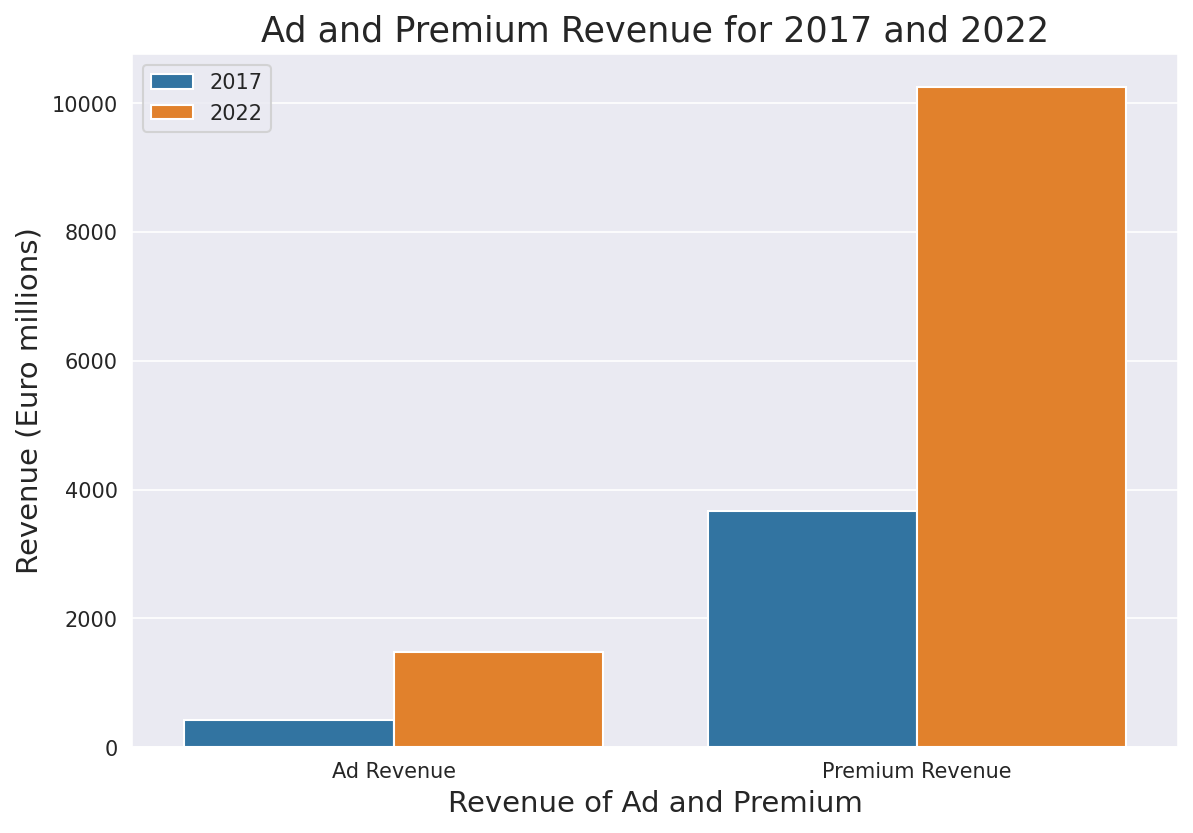

In [15]:
revenue_df = df.melt(id_vars =['Date','Year'], value_vars =  ['Ad Revenue','Premium Revenue'], value_name='revenue', var_name='revenue_type')
rev_df = revenue_df[(revenue_df['Year'].isin([2017, 2022]))]
year_revenue_df= rev_df.groupby(['Year','revenue_type'], as_index = False)['revenue'].sum()

sns.barplot(x = 'revenue_type', y = 'revenue', data = year_revenue_df, hue = 'Year')
plt.legend(title = None, fontsize = 10)
plt.xlabel('Revenue of Ad and Premium')
plt.ylabel('Revenue (Euro millions)')
plt.title('Ad and Premium Revenue for 2017 and 2022');

Spotify's ad-supported and premium revenue increased by 2.55 times and 1.8 times from 2017 to 2022.

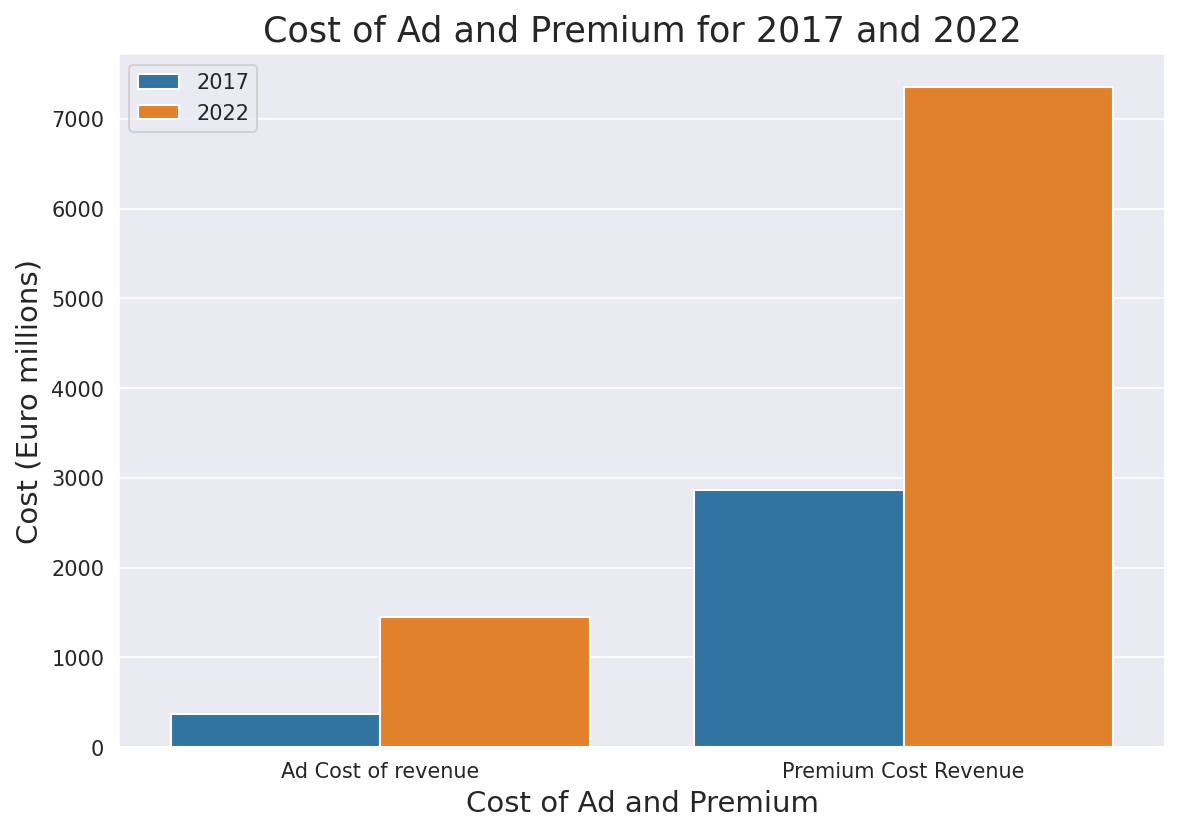

In [16]:
cost_df = df.melt(id_vars =['Date','Year'], value_vars =  ['Ad Cost of revenue','Premium Cost Revenue'], value_name='cost', var_name='cost_type')
costdf = cost_df[(cost_df['Year'].isin([2017, 2022]))]
year_cost_df = costdf.groupby(['Year', 'cost_type'], as_index = False)['cost'].sum()

sns.barplot(x = 'cost_type', y = 'cost', data = year_cost_df, hue = 'Year')
plt.legend(title = None, fontsize = 10)
plt.xlabel('Cost of Ad and Premium')
plt.ylabel('Cost (Euro millions)')
plt.title('Cost of Ad and Premium for 2017 and 2022');

Spotify's ad-supported and premium cost increased by 2.88 times and 1.56 times from 2017 to 2022.

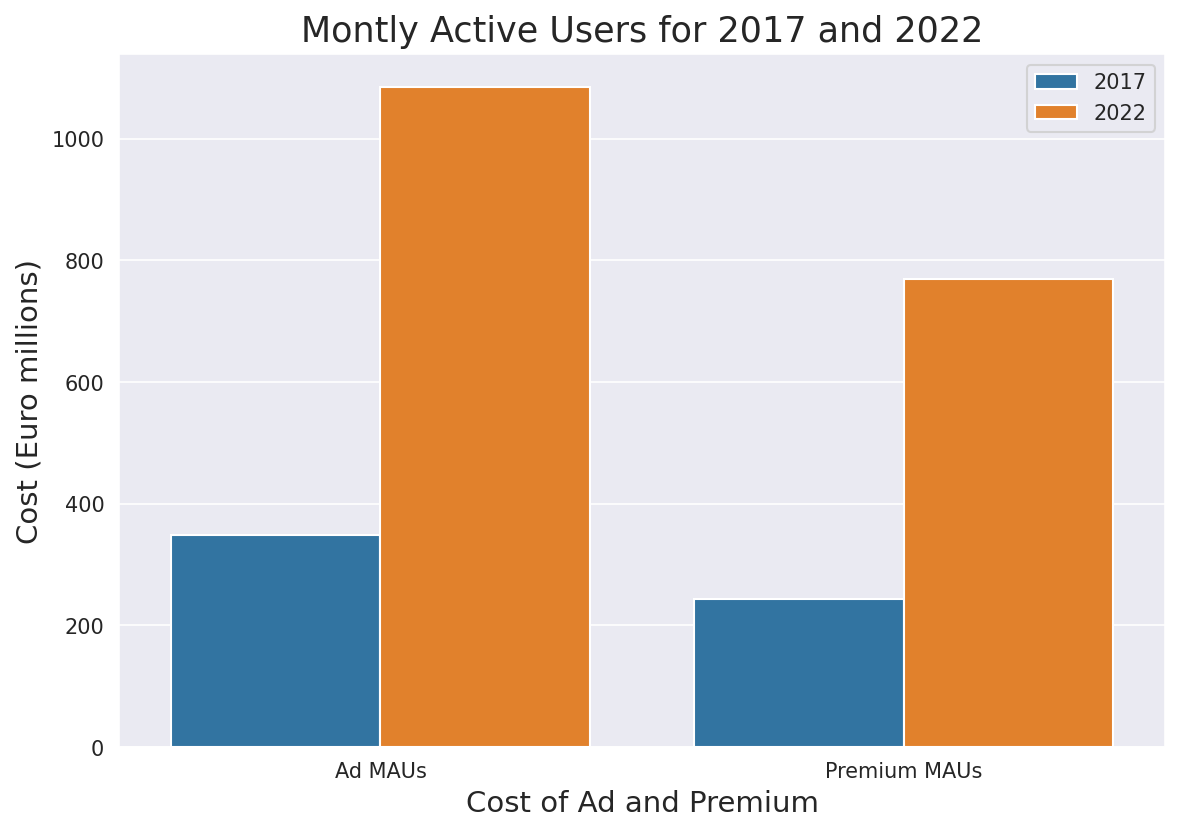

In [17]:
mau_df = df.melt(id_vars =['Date','Year'], value_vars =  ['Premium MAUs' ,'Ad MAUs' ], value_name='MAU', var_name='MAUs_type')
maudf = mau_df[(mau_df['Year'].isin([2017, 2022]))]
year_mau_df= maudf.groupby(['Year','MAUs_type'], as_index = False)['MAU'].sum()

sns.barplot(x = 'MAUs_type', y = 'MAU', data = year_mau_df, hue = 'Year')
plt.legend(title = None, fontsize = 10)
plt.xlabel('Cost of Ad and Premium')
plt.ylabel('Cost (Euro millions)')
plt.title('Montly Active Users for 2017 and 2022');

Spotify's ad-supported and premium monthly active users increased by 2.11 times and 2.16 times from 2017 to 2022. Almost similar increase for ad-supported and premium users. 

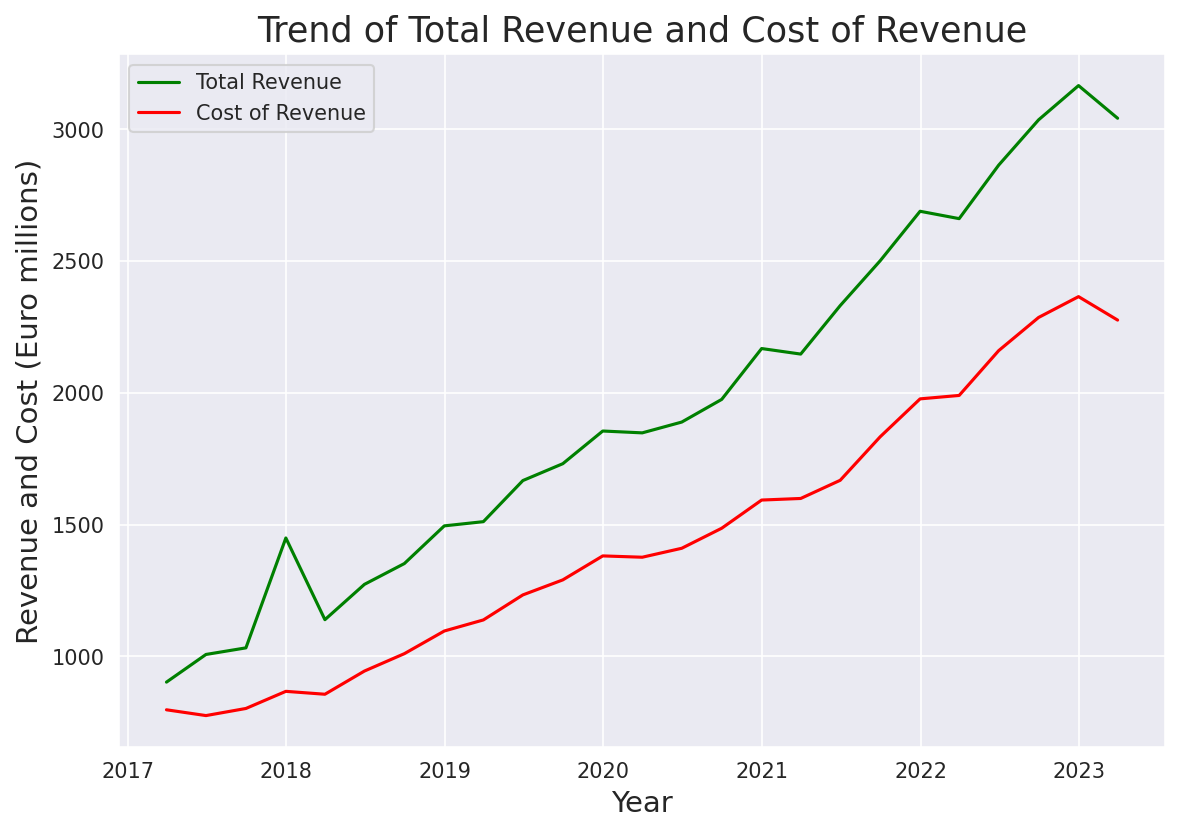

In [18]:
cost_rev_df = df.melt(id_vars =['Date','Year'], value_vars =  ['Total Revenue' ,'Cost of Revenue' ], value_name='Value', var_name='Rev&cost')

palette = {'Total Revenue': 'green', 'Cost of Revenue': 'red'}
sns.lineplot(x = 'Date', y = 'Value', data= cost_rev_df, hue =  'Rev&cost', palette = palette)
plt.xlabel('Year')
plt.ylabel('Revenue and Cost (Euro millions)')
plt.title('Trend of Total Revenue and Cost of Revenue')
plt.legend(title = None, fontsize = 10);

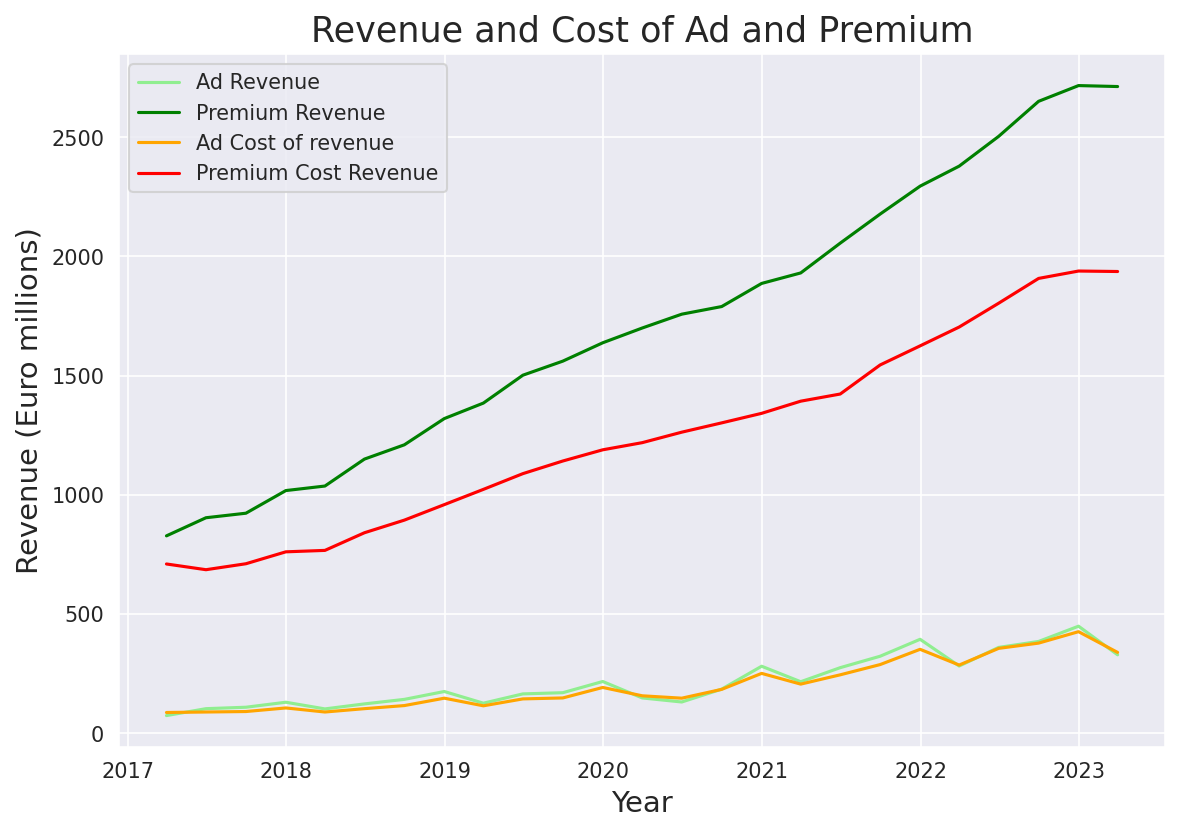

In [19]:
revenue_cost_df = df.melt(id_vars =['Date','Year'], value_vars =  ['Ad Revenue','Premium Revenue', 'Ad Cost of revenue','Premium Cost Revenue'], value_name='revenue', var_name='revenue_type')
palette = {'Ad Revenue': 'lightgreen','Premium Revenue': 'green','Ad Cost of revenue': 'orange','Premium Cost Revenue': 'red'}
sns.lineplot(x = 'Date', y = 'revenue', data = revenue_cost_df, hue = 'revenue_type',palette=palette)
plt.xlabel('Year')
plt.ylabel('Revenue (Euro millions)')
plt.title('Revenue and Cost of Ad and Premium')
plt.legend(title=None, fontsize = 10);

Even though Spotify’s ad-supported user base is larger, it’s the premium subscribers that bring in the lion’s share of the company’s revenue. Also ad-supported revenue is smilar to cost of ad-supported

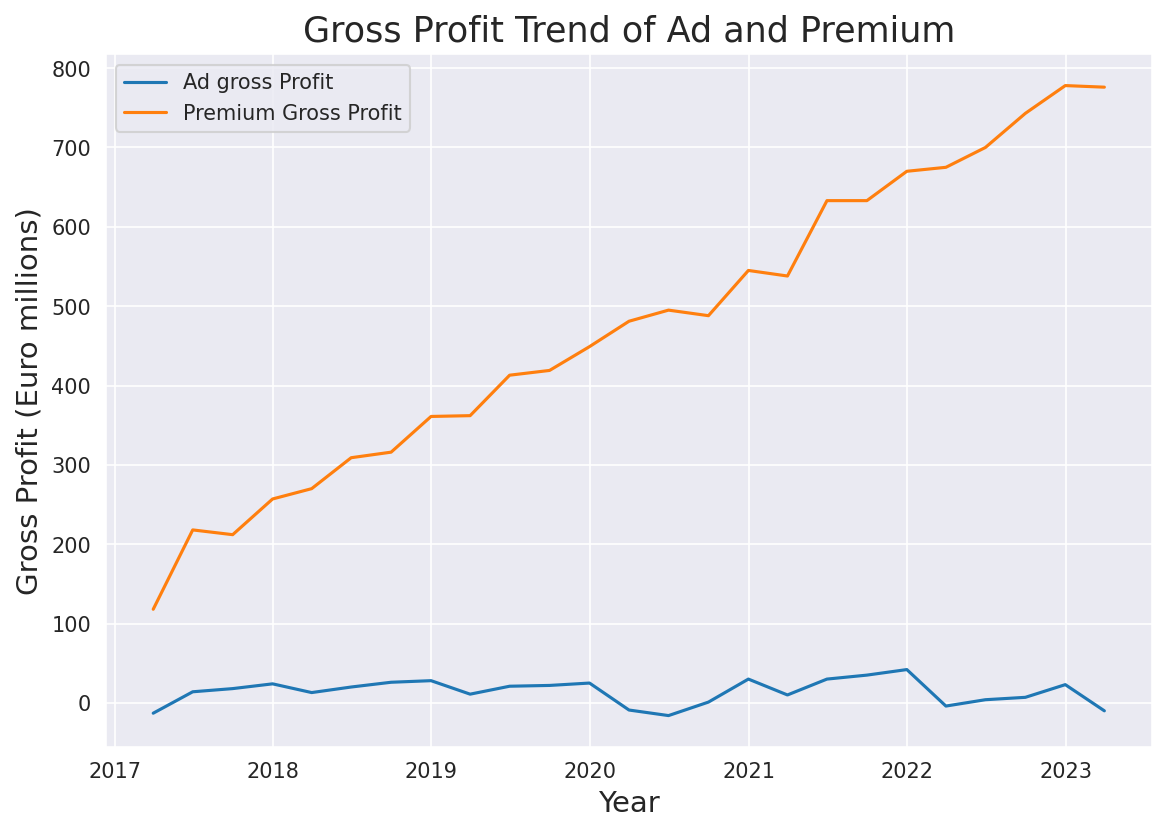

In [20]:
gprofit_cost_df = df.melt(id_vars =['Date','Year'], value_vars =  ['Ad gross Profit','Premium Gross Profit'], value_name='gross_profit', var_name='gross_profit_type')
#palette = {'Ad Revenue': 'green','Premium Revenue': 'green','Ad Cost of revenue': 'red','Premium Cost Revenue': 'red'}
sns.lineplot(x = 'Date', y = 'gross_profit', data = gprofit_cost_df, hue = 'gross_profit_type')
plt.xlabel('Year')
plt.ylabel('Gross Profit (Euro millions)')
plt.title('Gross Profit Trend of Ad and Premium')
plt.legend(title=None, fontsize = 10);

Just as we saw with revenue, the gross profit also follows a similar trend

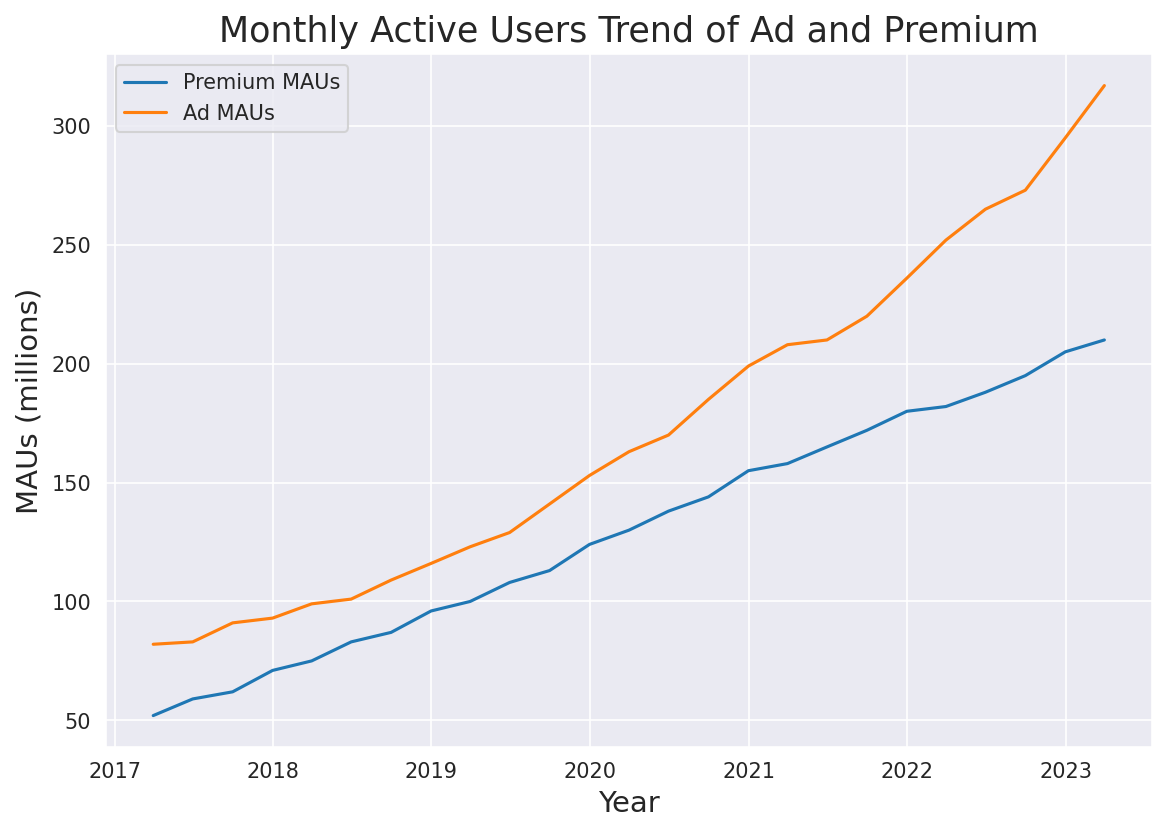

In [21]:
sns.lineplot(x = 'Date', y = 'MAU', data = mau_df, hue = 'MAUs_type')
plt.xlabel('Year')
plt.ylabel('MAUs (millions)')
plt.title('Monthly Active Users Trend of Ad and Premium')
plt.legend(title = None, fontsize = 10);

Ad-supported users has been increasing more than premium users since 2020.

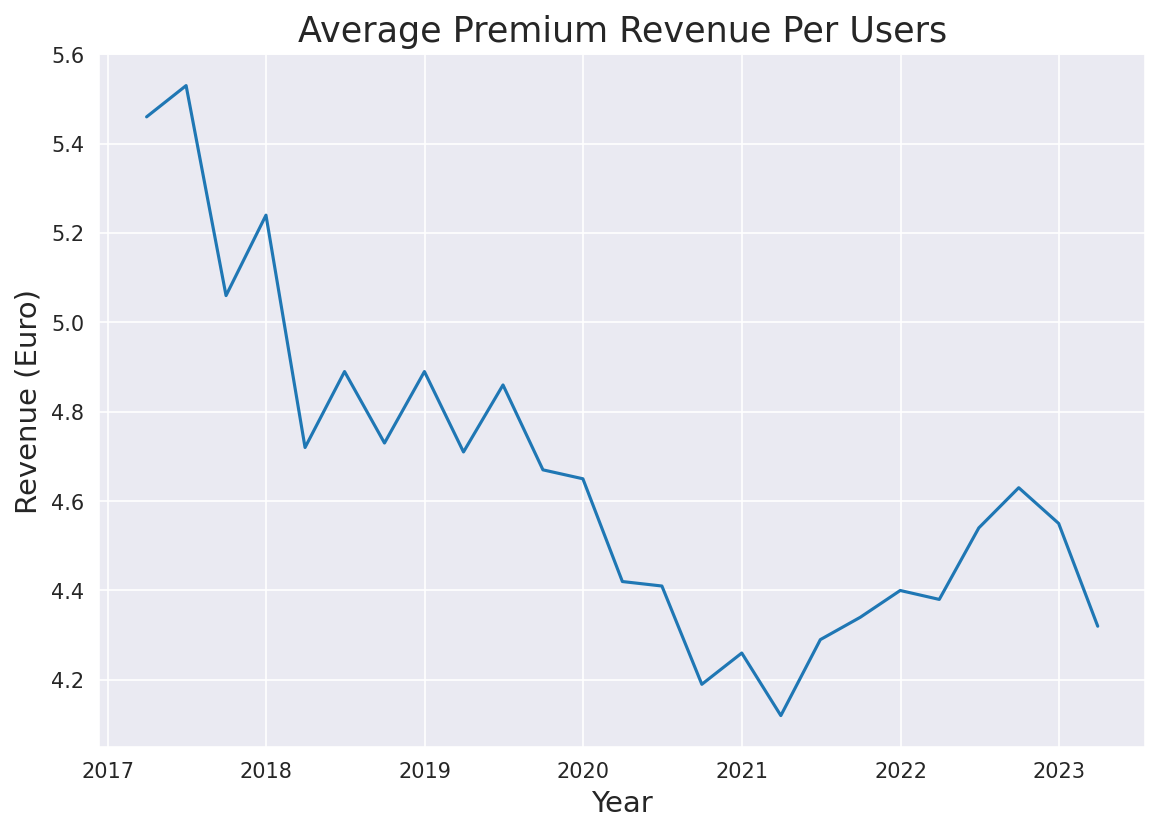

In [22]:
sns.lineplot(x = 'Date', y = 'Premium ARPU', data = df)
plt.xlabel('Year')
plt.ylabel('Revenue (Euro)')
plt.title('Average Premium Revenue Per Users');

Spotify’s premium average revenue per user (ARPU) has been decreasing since 2017 despite increasing in premium users. One reason for this decline could be that Spotify has been using discounted plans to attract subscribers in new markets like Russia and India, which has resulted in a lower average revenue per user.

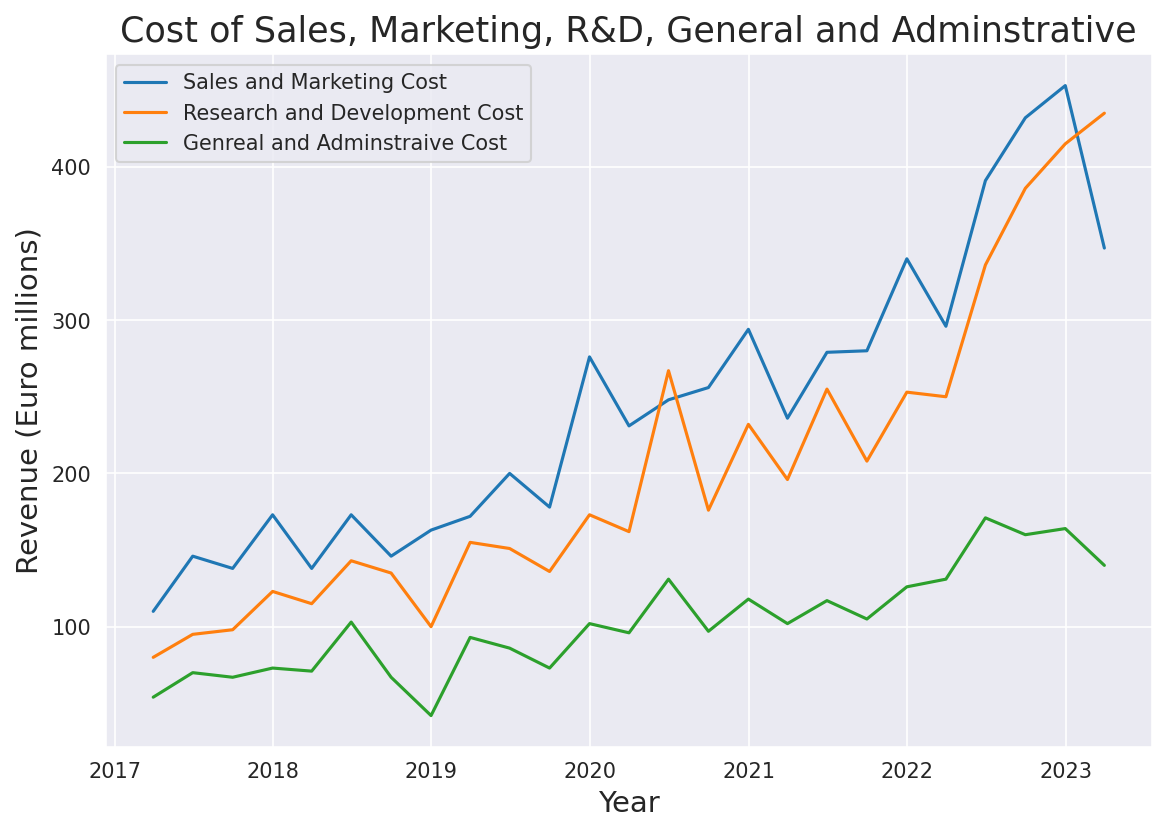

In [23]:
other_cost_df = df.melt(id_vars =['Date','Year'], value_vars =  ['Sales and Marketing Cost','Research and Development Cost', 'Genreal and Adminstraive Cost'], value_name='cost', var_name='cost_type')

sns.lineplot(x = 'Date', y = 'cost', data = other_cost_df, hue = 'cost_type')
plt.xlabel('Year')
plt.ylabel('Revenue (Euro millions)')
plt.title('Cost of Sales, Marketing, R&D, General and Adminstrative')
plt.legend(title=None, fontsize = 10);

            Total Revenue  Cost of Revenue  Gross Profit  Premium Revenue  \
Date                                                                        
2023-03-31         3042.0           2276.0         776.0           2713.0   
2022-12-31         3166.0           2365.0         801.0           2717.0   
2022-09-30         3036.0           2286.0         750.0           2651.0   
2022-06-30         2864.0           2160.0         704.0           2504.0   
2022-03-31         2661.0           1990.0         671.0           2379.0   

            Premium Cost Revenue  Premium Gross Profit  Ad Revenue  \
Date                                                                 
2023-03-31                1937.0                 776.0       329.0   
2022-12-31                1939.0                 778.0       449.0   
2022-09-30                1908.0                 743.0       385.0   
2022-06-30                1804.0                 700.0       360.0   
2022-03-31                1704.0        

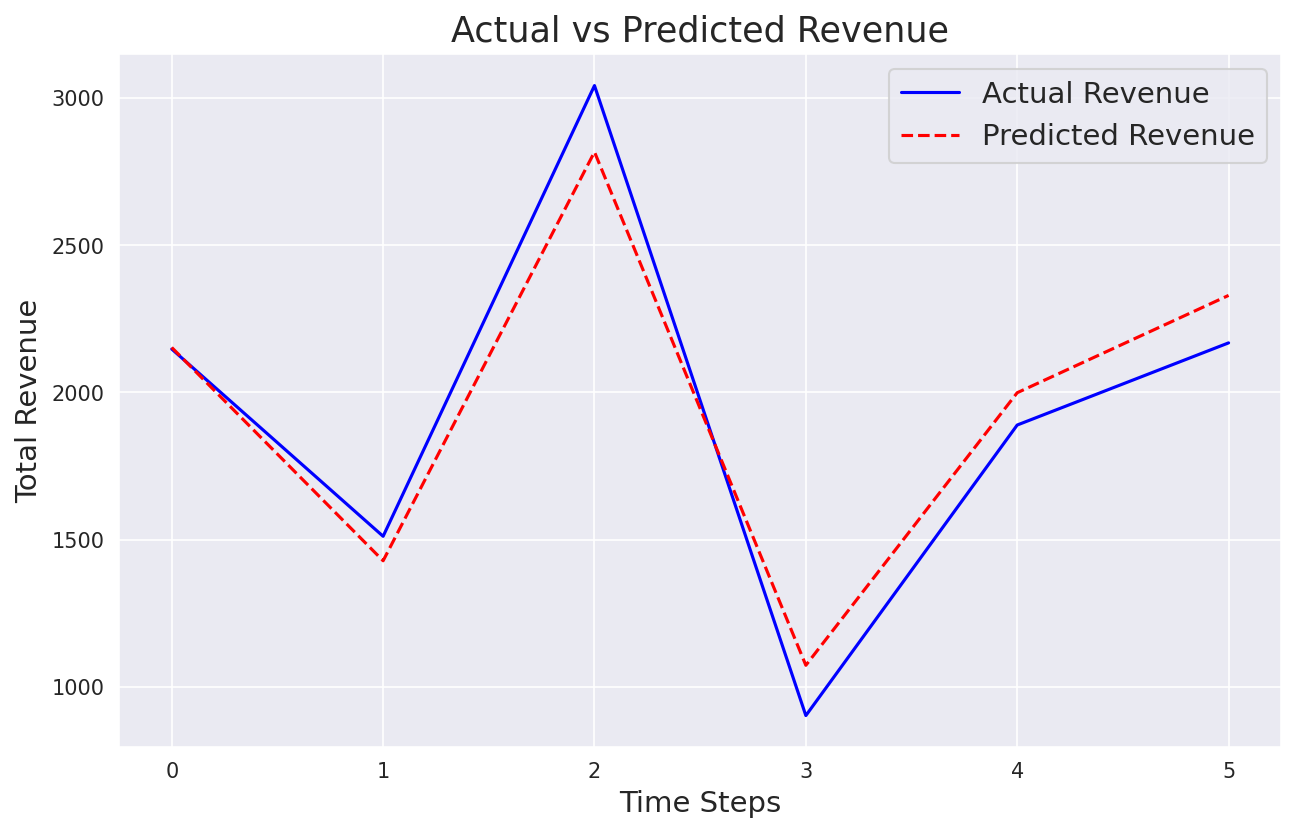

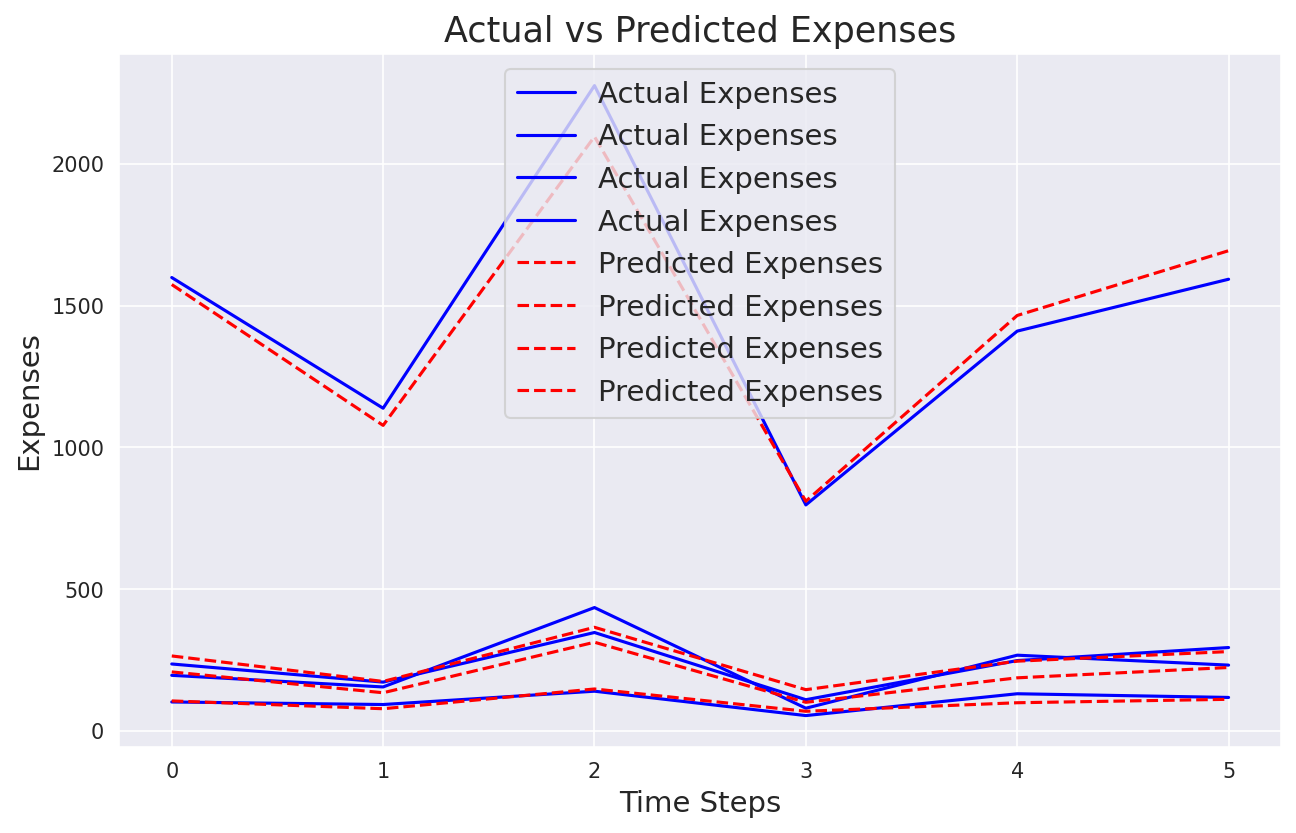

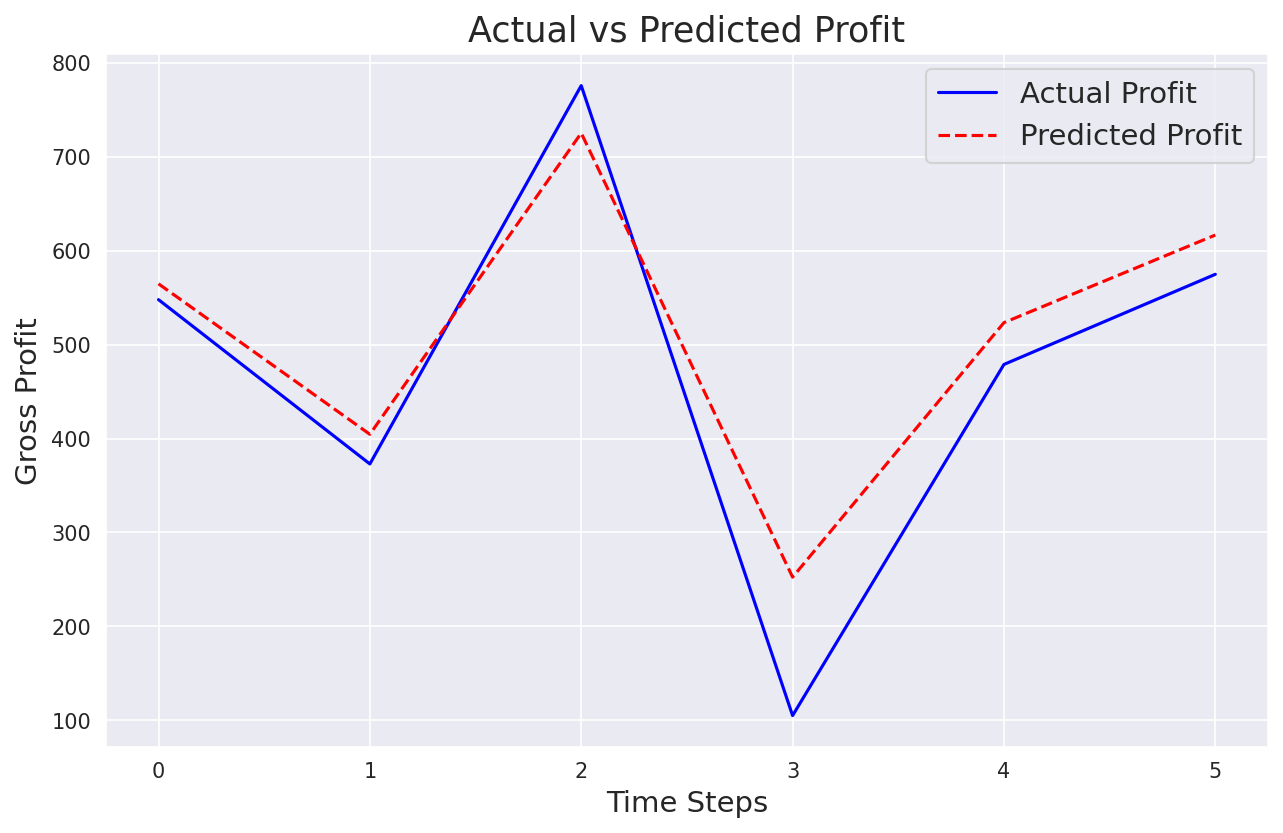

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import os

data = pd.read_csv("/kaggle/input/spotify-revenue-expenses-and-its-premium-users/Spotify Quarterly.csv")

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data.set_index('Date', inplace=True)
print(data.head())
data.fillna(data.mean(), inplace=True)
data['Quarter'] = data.index.quarter
data['Month'] = data.index.month

features = data[['Cost of Revenue', 'Ad Revenue', 'Premium Revenue', 'Ad Cost of revenue',
                 'Sales and Marketing Cost', 'Research and Development Cost', 'Genreal and Adminstraive Cost',
                 'Premium ARPU', 'Premium MAUs', 'MAUs', 'Quarter', 'Month']]
target_revenue = data['Total Revenue']
target_expenses = data[['Cost of Revenue', 'Sales and Marketing Cost', 'Research and Development Cost', 'Genreal and Adminstraive Cost']]
target_profit = data['Gross Profit']

X_train, X_test, y_train_revenue, y_test_revenue = train_test_split(features, target_revenue, test_size=0.2, random_state=42)
_, _, y_train_expenses, y_test_expenses = train_test_split(features, target_expenses, test_size=0.2, random_state=42)
_, _, y_train_profit, y_test_profit = train_test_split(features, target_profit, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

revenue_model = RandomForestRegressor(n_estimators=100, random_state=42)
revenue_model.fit(X_train_scaled, y_train_revenue)
y_pred_revenue = revenue_model.predict(X_test_scaled)
expense_model = RandomForestRegressor(n_estimators=100, random_state=42)
expense_model.fit(X_train_scaled, y_train_expenses)

y_pred_expenses = expense_model.predict(X_test_scaled)

profit_model = RandomForestRegressor(n_estimators=100, random_state=42)
profit_model.fit(X_train_scaled, y_train_profit)

y_pred_profit = profit_model.predict(X_test_scaled)

print(f"Revenue Model - R2 Score: {r2_score(y_test_revenue, y_pred_revenue)}")
print(f"Expense Model - R2 Score: {r2_score(y_test_expenses, y_pred_expenses)}")
print(f"Profit Model - R2 Score: {r2_score(y_test_profit, y_pred_profit)}")

plt.figure(figsize=(10, 6))
plt.plot(y_test_revenue.values, label='Actual Revenue', color='blue')
plt.plot(y_pred_revenue, label='Predicted Revenue', color='red', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Total Revenue')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test_expenses.values, label='Actual Expenses', color='blue')
plt.plot(y_pred_expenses, label='Predicted Expenses', color='red', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Expenses')
plt.title('Actual vs Predicted Expenses')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test_profit.values, label='Actual Profit', color='blue')
plt.plot(y_pred_profit, label='Predicted Profit', color='red', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Gross Profit')
plt.title('Actual vs Predicted Profit')
plt.legend()
plt.show()
